In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import scipy.stats as st
import numpy as np
from tqdm import tqdm
plt.rcParams['font.sans-serif'] = 'Arial'
colors = ['#452a3d', '#44757a', '#b7b5a0', '#eed5b7', '#e5855d', '#dd6c4c', '#d44c3c']
six_labels = ['Bus', 'Big Truck', 'Minivan', 'Sedan', 'SUV', 'Small Truck']

# Figure 3a-b

In [2]:
# def get_total_emission(df, t0, t1, get_2 = False):
#     temp = df[~((df.OrigTime >= t1) | (df.DestTime < t0))][['VehicleID', 'VehicleType', 'OrigTime', 'DestTime', 'TravelTime', 'Speed', 'Emission', 'Uncertainty', 'RoadLength']]
#     if get_2:
#         temp = temp[temp.VehicleType == 3]
#     temp['this_time'] = temp.DestTime.apply(lambda x: min(x, t1)) - temp.OrigTime.apply(lambda x: max(x, t0))
#     temp['time_ratio'] = temp.this_time / temp.TravelTime
#     return np.sum(temp.Emission * temp.time_ratio), np.sum(temp.RoadLength * temp.time_ratio), np.average(temp.Speed, weights = temp.time_ratio), np.sum(temp.this_time), temp.VehicleID.nunique(), np.sum(temp.this_time)/(t1-t0)

# def get_city_road_density(df, t0, t1):
#     rs = []
#     dt = (t1-t0) / 10
#     for i in range(10):
#         temp1 = df[(df.OrigTime <= t0 + dt * i) & (df.DestTime >= t0 + dt * i)]
#         r1 = temp1.groupby('RoadID').agg({'RoadLength': np.mean})
#         tot_len = np.sum(r1.RoadLength)
#         v_num = temp1.VehicleID.nunique()
#         rs.append(v_num / tot_len)
#     return np.mean(rs)

# der = []
# der_all = []
# der2 = []
# der2_all = []
# for t0 in tqdm(range(21600, 72000, 600)):
#     der.append(get_total_emission(df_sz1, t0, t0+600, get_2 = True))
#     der_all.append(get_total_emission(df_sz1, t0, t0+600, get_2 = False))
#     der2.append(get_total_emission(df_sz2, t0, t0+600, get_2 = True))
#     der2_all.append(get_total_emission(df_sz2, t0, t0+600, get_2 = False))

# den = []
# den2 = []
# for t0 in tqdm(range(21600, 72000, 600)):
#     den.append(get_city_road_density(df_sz1, t0, t0+600))
#     den2.append(get_city_road_density(df_sz2, t0, t0+600))

In [3]:
with open('data/jn_road_congestion_speed.pkl', 'rb') as f:
    results = pickle.load(f)
der, der_all, der2, der2_all, den, den2 = results

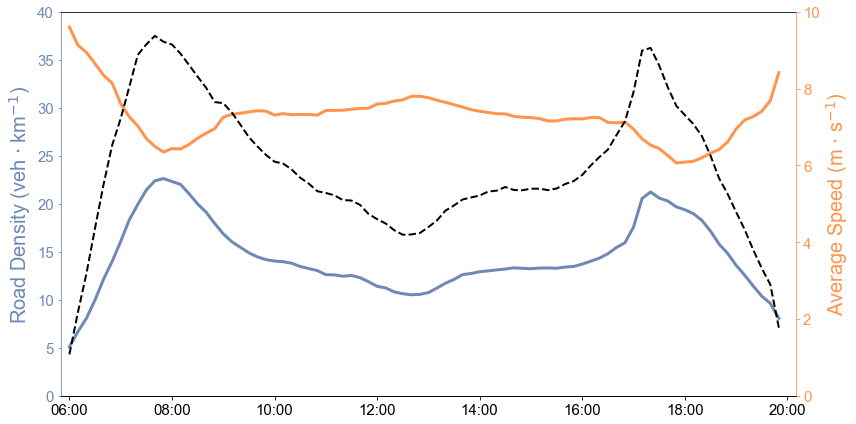

In [4]:
c0 = '#6e89b6'
c1 = '#ff944e'
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(den2, color=  c0, lw = 3)
ax.set_ylim(0, 40)
ax.set_xlim(-1, 85)
ax2 = ax.twinx()
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.plot([x[1] / x[3] * 1000 for x in der2_all], color=  c1, lw = 3)
ax2.set_ylim(0, 10)
ax.set_ylabel(r'Road Density (veh $\cdot$ km$^{-1}$)', size = 20, color = c0)
ax2.set_ylabel(r'Average Speed (m $\cdot$ s$^{-1}$)', size = 20, color = c1)
ax.set_yticks(range(0, 41, 5), range(0, 41, 5), size=15)
ax2.set_yticks(range(0, 11, 2), range(0, 11, 2), size=15)
ax.set_xticks(range(0, 85, 12), ['%02d:00'%x for x in range(6, 21, 2)], size = 15)
ax.tick_params(axis = 'y', colors = c0)
ax2.tick_params(axis = 'y', colors = c1)
ax.spines['left'].set_color(c0)
ax2.spines['right'].set_color(c1)
ax3 = ax.twinx()
ax3.plot([x[0] / 1000 * 6 for x in der2_all], lw = 2, ls = '--', color = 'black')
ax3.set_ylim(0, 500)
ax3.axis('off')
plt.tight_layout()
plt.show()

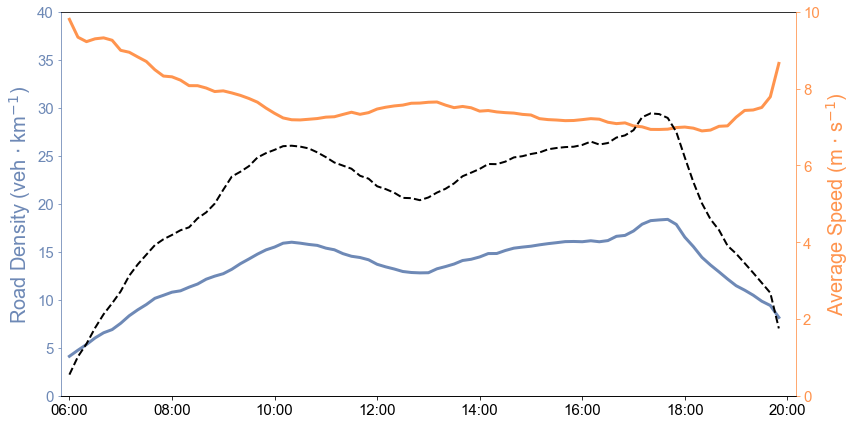

In [5]:
c0 = '#6e89b6'
c1 = '#ff944e'
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(den, color=  c0, lw = 3)
ax.set_ylim(0, 40)
ax.set_xlim(-1, 85)
ax2 = ax.twinx()
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.plot([x[1] / x[3] * 1000 for x in der_all], color=  c1, lw = 3)
ax2.set_ylim(0, 10)
ax.set_ylabel(r'Road Density (veh $\cdot$ km$^{-1}$)', size = 20, color = c0)
ax2.set_ylabel(r'Average Speed (m $\cdot$ s$^{-1}$)', size = 20, color = c1)
ax.set_yticks(range(0, 41, 5), range(0, 41, 5), size=15)
ax2.set_yticks(range(0, 11, 2), range(0, 11, 2), size=15)
ax.set_xticks(range(0, 85, 12), ['%02d:00'%x for x in range(6, 21, 2)], size = 15)
ax.tick_params(axis = 'y', colors = c0)
ax2.tick_params(axis = 'y', colors = c1)
ax.spines['left'].set_color(c0)
ax2.spines['right'].set_color(c1)
ax3 = ax.twinx()
ax3.plot([x[0] / 1000 * 6 for x in der_all], lw = 2, ls = '--', color = 'black')
ax3.set_ylim(0, 500)
ax3.axis('off')
plt.tight_layout()
plt.show()

# Figure 3c-d

In [6]:
## Calculate transport emission of each time interval
# df_jn1['start_window'] = ((df_jn1['OrigTime'] - 21600) / 600).astype(int)
# bytime_byvehicle_jn1 = df_jn1.groupby(['start_window', 'VehicleType'], as_index=False).agg({'Emission': sum, 'Uncertainty': sum, 'RoadLength': sum, 'TravelTime': sum})
# df_jn2['start_window'] = ((df_jn2['OrigTime'] - 21600) / 600).astype(int)
# bytime_byvehicle_jn2 = df_jn2.groupby(['start_window', 'VehicleType'], as_index=False).agg({'Emission': sum, 'Uncertainty': sum, 'RoadLength': sum, 'TravelTime': sum})

bytime_byvehicle_jn1 = pd.read_csv('data/bytime_byvehicle_jn_nw.csv')
bytime_byvehicle_jn2 = pd.read_csv('data/bytime_byvehicle_jn_w.csv')

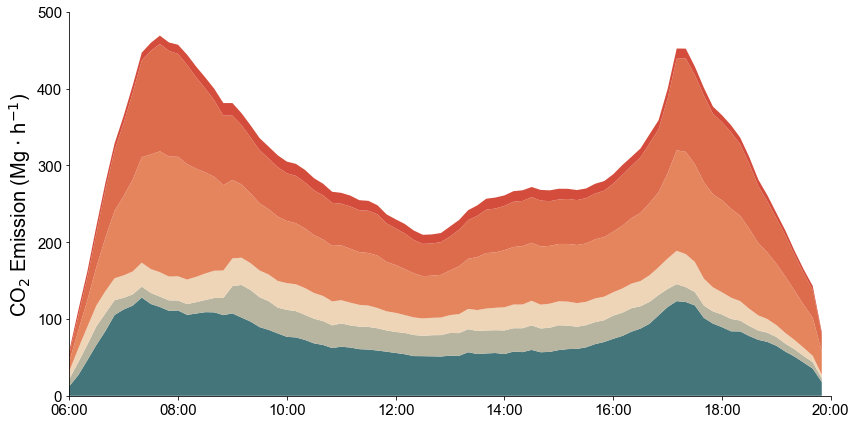

In [7]:
fig, ax = plt.subplots(figsize = (12, 6))
days = range(84)
emiss = []
for i in range(6):
    temp = bytime_byvehicle_jn2[bytime_byvehicle_jn2.VehicleType == i]
    emis = []
    for d in range(len(days)):
        ttemp = temp[temp.start_window == d].Emission
        dtime = temp[temp.start_window == d].TravelTime
        if ttemp.shape[0] == 0:
            emis.append(0)
        else:
            emis.append(ttemp.iloc[0] / 1000 * 6)
    emiss.append(emis)
plt.stackplot(days, emiss, baseline = 'zero', colors = colors[1:], labels = six_labels)
ax.set_xlim(0, 83)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel(r'CO$_2$ Emission (Mg $\cdot$ h$^{-1}$)', size = 20)
plt.yticks(range(0, 501, 100), size = 15)
plt.xticks(range(0, 85, 12), ['%02d:00'%x for x in range(6, 21, 2)], size = 15)
plt.tight_layout()
plt.show()

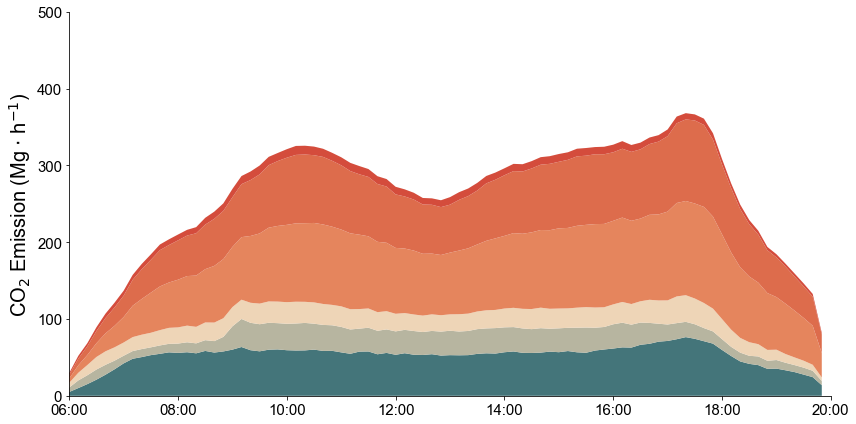

In [8]:
fig, ax = plt.subplots(figsize = (12, 6))
days = range(84)
emiss = []
for i in range(6):
    temp = bytime_byvehicle_jn1[bytime_byvehicle_jn1.VehicleType == i]
    emis = []
    for d in range(len(days)):
        ttemp = temp[temp.start_window == d].Emission
        dtime = temp[temp.start_window == d].TravelTime
        if ttemp.shape[0] == 0:
            emis.append(0)
        else:
            emis.append(ttemp.iloc[0] / 1000 * 6)
    emiss.append(emis)
plt.stackplot(days, emiss, baseline = 'zero', colors = colors[1:], labels = six_labels)
# fig.legend(loc = 'outside upper center', ncol = 3, frameon = False, fontsize = 16)
ax.set_xlim(0, 83)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel(r'CO$_2$ Emission (Mg $\cdot$ h$^{-1}$)', size = 20)
plt.yticks(range(0, 501, 100), size = 15)
plt.xticks(range(0, 85, 12), ['%02d:00'%x for x in range(6, 21, 2)], size = 15)
plt.tight_layout()
plt.show()

# Figure 3e

In [9]:
with open('data/grid_congestion_jn1.pkl', 'rb') as f:
    vals_jn1_1min = pickle.load(f)
with open('data/grid_congestion_jn2.pkl', 'rb') as f:
    vals_jn2_1min = pickle.load(f)

In [10]:
def get_density(dfs):
    densities = []
    for idx, i in enumerate(dfs):
        ii = i.copy()
        if 'grid' in ii.columns:
            ii = ii.set_index('grid')
        ii[f'density_{idx}'] =  ii.VehicleID / ii.RoadLength
        curr_density = ii[f'density_{idx}']
        densities.append(curr_density)
    temp0 = densities[0]
    for j in range(1, len(densities)):
        temp0 = pd.merge(temp0, densities[j], on = 'grid', how = 'outer')
    return dict(temp0.mean(axis = 1))

df_big = []
for df1, dfs in tqdm(vals_jn2_1min):
       df0 = df1.copy()
       df0.columns = ['total_emission', 'total_vehicle_flow', 'road_num',
              'total_drive_length', 'total_drive_time', 'total_sedan_emission',
              'total_sedan_flow', 'total_sedan_drive_length',
              'total_sedan_drive_time']
       df0 = df0[df0.total_vehicle_flow >= 5]
       df0['AverageSpeed'] = df0.total_drive_length / df0.total_drive_time
       df0['AverageSpeed_sedan'] = df0.total_sedan_drive_length / df0.total_sedan_drive_time
       df0['EmissionPerRoad'] = df0.total_emission / df0.road_num
       df0['EmissionPerLength'] = df0.total_emission / df0.total_drive_length
       df0['EmissionPerLength_sedan'] = df0.total_sedan_emission / df0.total_sedan_drive_length
       df0['EmissionPerVehicle'] = df0.total_emission / df0.total_vehicle_flow
       df0['EmissionPerVehicle_sedan'] = df0.total_sedan_emission / df0.total_sedan_flow
       density_dict = get_density(dfs)
       df0['RoadDensity'] = list(map(lambda x: density_dict.get(x, np.nan), df0.index))
       df_big.append(df0.copy())
df_big = pd.concat(df_big, ignore_index = False)

df_big1 = []
for df1, dfs in tqdm(vals_jn1_1min):
       df0 = df1.copy()
       df0.columns = ['total_emission', 'total_vehicle_flow', 'road_num',
              'total_drive_length', 'total_drive_time', 'total_sedan_emission',
              'total_sedan_flow', 'total_sedan_drive_length',
              'total_sedan_drive_time']
       df0 = df0[df0.total_vehicle_flow >= 5]
       df0['AverageSpeed'] = df0.total_drive_length / df0.total_drive_time
       df0['AverageSpeed_sedan'] = df0.total_sedan_drive_length / df0.total_sedan_drive_time
       df0['EmissionPerRoad'] = df0.total_emission / df0.road_num
       df0['EmissionPerLength'] = df0.total_emission / df0.total_drive_length
       df0['EmissionPerLength_sedan'] = df0.total_sedan_emission / df0.total_sedan_drive_length
       df0['EmissionPerVehicle'] = df0.total_emission / df0.total_vehicle_flow
       df0['EmissionPerVehicle_sedan'] = df0.total_sedan_emission / df0.total_sedan_flow
       density_dict = get_density(dfs)
       df0['RoadDensity'] = list(map(lambda x: density_dict.get(x, np.nan), df0.index))
       df_big1.append(df0.copy())

df_big1 = pd.concat(df_big1, ignore_index = False)
df_big2 = pd.concat([df_big, df_big1], ignore_index = False).reset_index()
# ef = (np.sum(df_jn2[df_jn2.VehicleType == 3].Emission) + np.sum(df_jn1[df_jn1.VehicleType == 3].Emission)) / (np.sum(df_jn2[df_jn2.VehicleType == 3].RoadLength)+np.sum(df_jn1[df_jn1.VehicleType == 3].RoadLength))
ef = 0.2418608323775137

100%|██████████| 840/840 [00:14<00:00, 58.73it/s]


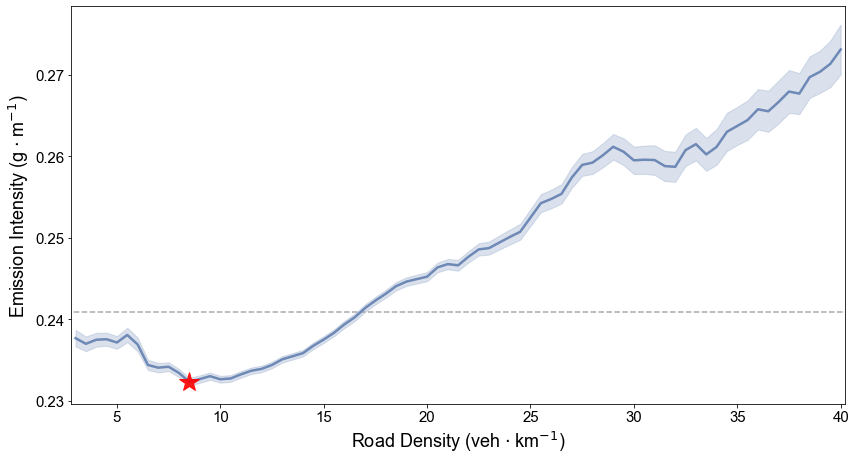

In [11]:
xvar = 'RoadDensity'
yvar = 'EmissionPerLength_sedan'
xs = np.linspace(2.5, 40.5, 77)
ef = 0.24083787145554367
yms = []
ylows = []
yhighs = []
for i in range(1, len(xs)-1):
    fb_data = df_big2[(df_big2[xvar] >= xs[i-1]) & (df_big2[xvar]<xs[i+1])][yvar]
    x0, x1 = np.percentile(fb_data, [1, 98])
    fb_data = np.clip(fb_data, x0, x1)
    ym = np.mean(fb_data)
    ylow, yhigh = st.t.interval(0.95, df = len(fb_data)-1, loc=np.mean(fb_data), scale=st.sem(fb_data.dropna()))
    yms.append(ym)
    ylows.append(ylow)
    yhighs.append(yhigh)
fig, ax = plt.subplots(figsize = (12, 6.5))
plt.hlines(ef, 1, 45, lw = 1.5, ls = '--', color='darkgray')
plt.xlim(2.8, 40.2)

plt.plot(xs[1:-1], yms, color = c0, lw = 2.5)
plt.fill_between(xs[1:-1], ylows, yhighs, color = c0, alpha =0.25)
amin = np.argmin(yms)
ax.plot(xs[1:-1][amin], yms[amin], 'r*', markersize=20, alpha = 0.9)
plt.xticks(size = 15)
plt.yticks([0.23, 0.24, 0.25, 0.26, 0.27], size = 15)
plt.xlabel(r'Road Density (veh $\cdot$ km$^{-1}$)', size = 18)
plt.ylabel(r'Emission Intensity (g $\cdot$ m$^{-1}$)', size = 18)
plt.tight_layout()
plt.show()

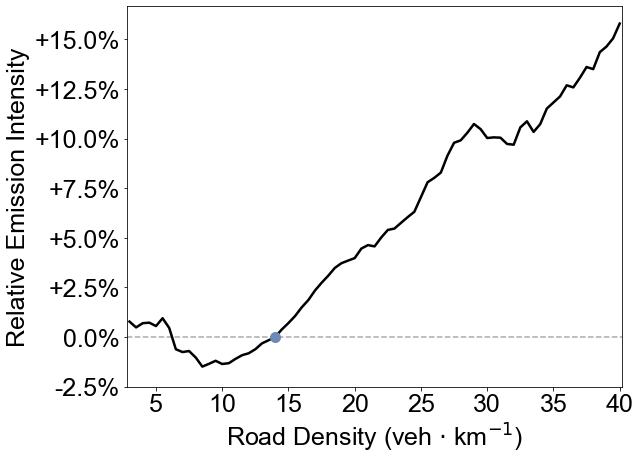

In [12]:
fig, ax = plt.subplots(figsize = (9, 6.5))
plt.hlines(1, 1, 45, lw = 1.5, color='darkgray', ls = '--')
plt.xlim(2.8, 40.2)
xs_new = xs[1:-1]
yms1 = yms / yms[22]
plt.plot(xs_new, yms1, color = 'black', lw = 2.5)
ax.plot(xs_new[22], 1, c = c0, marker = 'o', markersize=10)
plt.xticks(size = 25)
plt.yticks([0.975, 1, 1.025, 1.050, 1.075, 1.1, 1.125, 1.15], ['-2.5%', '0.0%', '+2.5%', '+5.0%', '+7.5%', '+10.0%', '+12.5%' ,'+15.0%'], size = 25)
plt.xlabel(r'Road Density (veh $\cdot$ km$^{-1}$)', size = 25)
plt.ylabel(r'Relative Emission Intensity', size = 25)
plt.tight_layout()
plt.show()

# Figure 3f

In [13]:
# def get_city_road_density(df, t0, t1):
#     rs = []
#     dt = (t1-t0) / 10
#     for i in range(10):
#         temp1 = df[(df.OrigTime <= t0 + dt * i) & (df.DestTime >= t0 + dt * i)]
#         r1 = temp1.groupby('RoadID').agg({'RoadLength': np.mean})
#         tot_len = np.sum(r1.RoadLength)
#         v_num = temp1.VehicleID.nunique()
#         rs.append(v_num / tot_len)
#     return np.mean(rs)

# type2public = {0: 1, 3: 0, 4: 0}
# def get_total_bytype(df, t0, t1, types = []):
#     temp = df[~((df.OrigTime >= t1) | (df.DestTime < t0))][['VehicleID', 'VehicleType', 'OrigTime', 'DestTime', 'TravelTime', 'Speed', 'Emission', 'Uncertainty', 'RoadLength']]
#     temp = temp[temp.VehicleType.isin(types)]
#     temp['this_time'] = temp.DestTime.apply(lambda x: min(x, t1)) - temp.OrigTime.apply(lambda x: max(x, t0))
#     temp['time_ratio'] = temp.this_time / temp.TravelTime
#     return np.sum(temp.Emission * temp.time_ratio), np.sum(temp.RoadLength * temp.time_ratio), np.average(temp.Speed, weights = temp.time_ratio), np.sum(temp.this_time), temp.VehicleID.nunique(), np.sum(temp.this_time)/(t1-t0)

# den = []
# den2 = []
# for t0 in tqdm(range(21600, 72000, 60)):
#     den.append(get_city_road_density(df_jn1, t0, t0+60))
#     den2.append(get_city_road_density(df_jn2, t0, t0+60))

# bus1 = []
# private1 = []
# bus2 = []
# private2 = []
# for t0 in tqdm(range(21600, 72000, 60)):
#     bus1.append(get_total_bytype(df_jn1, t0, t0+60, types = [0]))
#     private1.append(get_total_bytype(df_jn1, t0, t0+60, types = [3, 4]))
#     bus2.append(get_total_bytype(df_jn2, t0, t0+60, types = [0]))
#     private2.append(get_total_bytype(df_jn2, t0, t0+60, types = [3, 4]))

# sedan1 = []
# suv1 = []
# sedan2 = []
# suv2 = []
# for t0 in tqdm(range(21600, 72000, 60)):
#     sedan1.append(get_total_bytype(df_jn1, t0, t0+60, types = [3]))
#     suv1.append(get_total_bytype(df_jn1, t0, t0+60, types = [4]))
#     sedan2.append(get_total_bytype(df_jn2, t0, t0+60, types = [3]))
#     suv2.append(get_total_bytype(df_jn2, t0, t0+60, types = [4]))

In [14]:
with open('data/bus_vs_private.pkl', 'rb') as f:
    result_jn = pickle.load(f)
den, den2, bus1, bus2, private1, private2, sedan1, sedan2, suv1, suv2 = result_jn

In [15]:
xs = np.linspace(5, 23, 10)
ys = []
ys_private = []
ys_private1 = []
for i in range(len(xs) - 1):
    y1s = []
    y2s = []
    y3s = []
    for ii in range(len(den)):
        if den[ii] >= xs[i] and den[ii] < xs[i+1]:
            y1s.append(bus1[ii][0] / bus1[ii][1])
            y2s.append(private1[ii][0] / private1[ii][1])
            y3s.append((sedan1[ii][0] + suv1[ii][0]) / (sedan1[ii][1]*5+suv1[ii][1]*7))
    for ii in range(len(den2)):
        if den2[ii] >= xs[i] and den2[ii] < xs[i+1]:
            y1s.append(bus2[ii][0] / bus2[ii][1])
            y2s.append(private2[ii][0] / private2[ii][1])
            y3s.append((sedan2[ii][0] + suv2[ii][0]) / (sedan2[ii][1]*5+suv2[ii][1]*7))
    if len(y1s):
        ys.append(np.mean(y1s))
        ys_private.append(np.mean(y2s))
        ys_private1.append(np.mean(y3s))
    else:
        ys.append(np.nan)
        ys_private.append(np.nan)
        ys_private1.append(np.nan)

upper_bus = np.array(ys) / 14 # bus avg.
lower_bus = np.array(ys) / 40 # bus full
upper_private = np.array(ys_private) / 1.5 # private veh. avg.
lower_private = np.array(ys_private1) # private veh. full

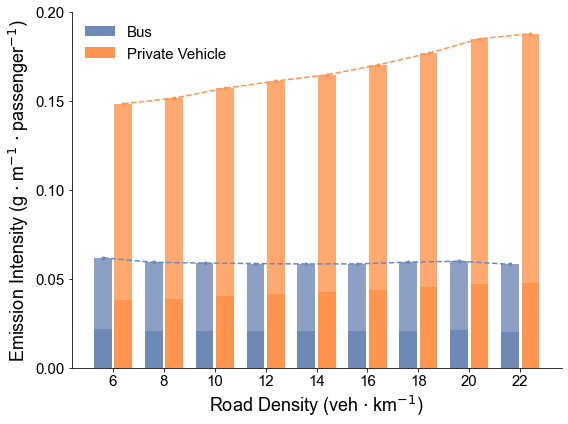

In [16]:
c0 = '#6e89b6'
c1 = '#ff944e'
fig, ax = plt.subplots(figsize = (8, 6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'Road Density (veh $\cdot$ km$^{-1}$)', size = 18)
ax.set_ylabel(r'Emission Intensity (g $\cdot$ m$^{-1}$ $\cdot$ passenger$^{-1}$)', size = 18)
plt.yticks([0,0.05,0.1,0.15,0.2], size = 15)
plt.bar(x = xs[:-1] - 0.4, height = upper_bus, width = 0.7, color = c0, alpha = 0.8)
plt.bar(x = xs[:-1] - 0.4, height = lower_bus, width = 0.7, color = c0, label = 'Bus')
plt.bar(x = xs[:-1] + 0.4, height = upper_private, width = 0.7, color = c1, alpha = 0.8)
plt.bar(x = xs[:-1] + 0.4, height = lower_private, width = 0.7, color = c1, label = 'Private Vehicle')
plt.plot(xs[:-1] - 0.4, upper_bus, color = c0, ls = '--', marker = '.')
plt.plot(xs[:-1] + 0.4, upper_private, color = c1, ls = '--', marker = '.')
plt.legend(frameon = False, fontsize = 15)
plt.xticks(xs[:-1], ((xs[:-1] + xs[1:])/2).astype(int), size = 15)
plt.ylim(0, 0.2)
plt.tight_layout()
plt.show()